<a href="https://colab.research.google.com/github/pragneshrana/DeepLearning/blob/master/TrainingFeedForwardNN/Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Files



In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
from tqdm import tqdm_notebook
import sys
from sklearn.preprocessing import OneHotEncoder
from sklearn.datasets import make_blobs


In [100]:
np.random.seed()

In [101]:
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red","yellow","green"])

## Generate data

In [102]:
data, labels = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=0)
print(data.shape, labels.shape)

(1000, 2) (1000,)


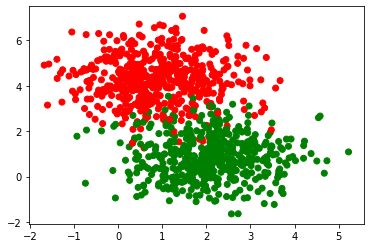

In [103]:
plt.scatter(data[:,0], data[:,1], c=labels, cmap=my_cmap)
plt.show()

In [104]:
X_train, X_val, Y_train, Y_val = train_test_split(data, labels, stratify=labels, random_state=0)
print(X_train.shape, X_val.shape)
print(np.unique(Y_train))

(750, 2) (250, 2)
[0 1]


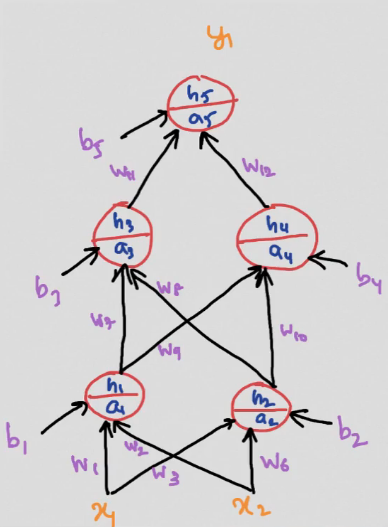

In [105]:
class FFSN:

  def __init__(self,):
    self.w1 = np.random.randn()
    self.w2 = np.random.randn()
    self.w3 = np.random.randn()
    self.w4 = np.random.randn()
    self.w5 = np.random.randn()
    self.w6 = np.random.randn()
    self.w7 = np.random.randn()
    self.w8 = np.random.randn()
    self.w9 = np.random.randn()
    self.w10 = np.random.randn()
    self.b1 = 0
    self.b2 = 0
    self.b3 = 0
    self.b4 = 0
    self.b5 = 0

  def sigmoid(self,x):
    return 1/(1+np.exp(-x))
  
  def forward_pass(self,x):
    self.x1 , self.x2 = x

    #hidden layer - 1 
    self.a1 = self.w1 * self.x1 + self.w2 * self.x2 + self.b1
    self.a2 = self.w3 * self.x1 + self.w4 * self.x2 + self.b2
    self.h1 = self.sigmoid(self.a1)
    self.h2 = self.sigmoid(self.a2)

    #hidden layer - 1 
    self.a3 = self.w5 * self.h1 + self.w6 * self.h2 + self.b3
    self.a4 = self.w7 * self.x1 + self.w8 * self.x2 + self.b4
    self.h3 = self.sigmoid(self.a3)
    self.h4 = self.sigmoid(self.a4)

    #output layer
    self.a5 = self.w9 * self.h3 + self.w10 * self.h4 + self.b5
    self.h5 = self.sigmoid(self.a5)
    return self.h5

  def grad(self,x,y):
    self.forward_pass(x)
    self.y = y
    self.dw9 = (self.h5-y) * self.h5 *(1-self.h5) * self.h3
    self.dw10= (self.h5-y) * self.h5 *(1-self.h5) * self.h4
    self.db5 = (self.h5-y) * self.h5 *(1-self.h5)

    self.dw8 = (self.h5-y) * self.h5 *(1-self.h5) * self.w9 * self.h3 * (1-self.h3) * self.h1
    self.dw7= (self.h5-y) * self.h5 *(1-self.h5) * self.w9 * self.h3 * (1-self.h3) * self.h1
    self.db3 = (self.h5-y) * self.h5 *(1-self.h5) * self.w9 * self.h3 * (1-self.h3)

    self.dw5 = (self.h5-y) * self.h5 *(1-self.h5) * self.w10 * self.h3 * (1-self.h3) * self.h2
    self.dw6= (self.h5-y) * self.h5 *(1-self.h5) * self.w10 * self.h3 * (1-self.h3) * self.h2
    self.db4 = (self.h5-y) * self.h5 *(1-self.h5) * self.w10 * self.h3 * (1-self.h3)

    self.dw4 = (self.h5-y) * self.h5 *(1-self.h5) * (self.w6 * self.w9 + self.w8 * self.w10) * self.h3 * (1-self.h3) * self.h1 * (1-self.h1) * self.x1
    self.dw3 = (self.h5-y) * self.h5 *(1-self.h5) * (self.w6 * self.w9 + self.w8 * self.w10) * self.h3 * (1-self.h3) * self.h1 * (1-self.h1) * self.x2
    self.db2 = (self.h5-y) * self.h5 *(1-self.h5) * (self.w6 * self.w9 + self.w8 * self.w10) * self.h3 * (1-self.h3) * self.h1 * (1-self.h1) 

    self.dw2 = (self.h5-y) * self.h5 *(1-self.h5) * (self.w5 * self.w9 + self.w7 * self.w10) * self.h3 * (1-self.h3) * self.h1 * (1-self.h1) * self.x1
    self.dw1 = (self.h5-y) * self.h5 *(1-self.h5) * (self.w5 * self.w9 + self.w7 * self.w10) * self.h3 * (1-self.h3) * self.h1 * (1-self.h1) * self.x2
    self.db1 = (self.h5-y) * self.h5 *(1-self.h5) * (self.w5 * self.w9 + self.w7 * self.w10) * self.h3 * (1-self.h3) * self.h1 * (1-self.h1) 

  def fit(self, X, Y,epochs=1, learning_rate=1, initialise=True, display_loss=True,display_weights = True):
    
    # initialise w, b
    if initialise:
      self.w1 = np.random.randn()
      self.w2 = np.random.randn()
      self.w3 = np.random.randn()
      self.w4 = np.random.randn()
      self.w5 = np.random.randn()
      self.w6 = np.random.randn()
      self.w7 = np.random.randn()
      self.w8 = np.random.randn()
      self.w9 = np.random.randn()
      self.w10 = np.random.randn()
      self.b1 = 0
      self.b2 = 0
      self.b3 = 0
      self.b4 = 0
      self.b5 = 0
      
    if display_loss:
      loss = {}
      w1 = {}
    
    for i in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):
      dw1, dw2, dw3, dw4, dw5, dw6, dw7, dw8, dw9, dw10, db1, db2, db3, db4, db5 = [0]*15
      for x, y in zip(X, Y):
        self.grad(x, y)
        dw1 += self.dw1
        dw2 += self.dw2
        dw3 += self.dw3
        dw4 += self.dw4
        dw5 += self.dw5
        dw6 += self.dw6
        dw7 += self.dw7
        dw8 += self.dw8
        dw9 += self.dw9
        dw10 += self.dw10
        db1 += self.db1
        db2 += self.db2
        db3 += self.db3
        db4 += self.db4
        db5 += self.db5
        
      m = X.shape[1]
      self.w1 -= learning_rate * dw1 / m
      self.w2 -= learning_rate * dw2 / m
      self.w3 -= learning_rate * dw3 / m
      self.w4 -= learning_rate * dw4 / m
      self.w5 -= learning_rate * dw5 / m
      self.w6 -= learning_rate * dw6 / m
      self.w7 -= learning_rate * dw7 / m
      self.w8 -= learning_rate * dw8 / m
      self.w9 -= learning_rate * dw9 / m
      self.w10 -= learning_rate * dw10 / m
      self.b1 -= learning_rate * db1 / m
      self.b2 -= learning_rate * db2 / m
      self.b3 -= learning_rate * db3 / m
      self.b4 -= learning_rate * db4 / m
      self.b5 -= learning_rate * db5 / m
      
      if display_loss:
        Y_pred = self.predict(X)
        loss[i] = mean_squared_error(Y_pred, Y)

      if display_weights:
        weight_matrix = np.array([[self.b1,self.w1,self.w2,self.b2,self.w3,self.w4],[self.b3,self.w5,self.w6,self.b4,self.w7,self.w8],[0,self.w9,self.w10,self.b5,0,0]])
        weight_matrices.append(weight_matrix)
            
    if display_loss:
      plt.plot(np.array(list(loss.values())).astype(float))      
      plt.xlabel('Epochs')
      plt.ylabel('Mean Squared Error')
      plt.show()
      
  def predict(self, X):
    Y_pred = []
    for x in X:
      y_pred = self.forward_pass(x)
      Y_pred.append(y_pred)
    return np.array(Y_pred)

  def predict_h1(self, X):
    Y_pred = []
    for x in X:
      y_pred = self.forward_pass(x)
      Y_pred.append(self.h1)
    return np.array(Y_pred)

  def predict_h2(self, X):
    Y_pred = []
    for x in X:
      y_pred = self.forward_pass(x)
      Y_pred.append(self.h2)
    return np.array(Y_pred)

  def predict_h3(self, X):
    Y_pred = []
    for x in X:
      y_pred = self.forward_pass(x)
      Y_pred.append(self.h3)
    return np.array(Y_pred)

  def predict_h4(self, X):
    Y_pred = []
    for x in X:
      y_pred = self.forward_pass(x)
      Y_pred.append(self.h4)
    return np.array(Y_pred)

  def predict_h5(self, X):
    Y_pred = []
    for x in X:
      y_pred = self.forward_pass(x)
      Y_pred.append(self.h5)
    return np.array(Y_pred)

  def predict_h6(self, X):
    Y_pred = []
    for x in X:
      y_pred = self.forward_pass(x)
      Y_pred.append(self.h6)
    return np.array(Y_pred)                



In [106]:
weight_matrices = []
X_train, X_val, Y_train, Y_val = train_test_split(data, labels, stratify=labels, random_state=0)
print(X_train.shape, X_val.shape, labels.shape)

(750, 2) (250, 2) (1000,)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:90: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


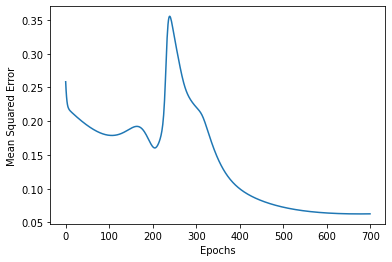

In [107]:
ffsn = FFSN()
ffsn.fit(X_train,Y_train,epochs=700,learning_rate=.005,display_loss=True)

In [108]:
Y_pred_train = ffsn.predict(X_train)
Y_pred_binarised_train = (Y_pred_train >= 0.5).astype("int").ravel()

Y_pred_val = ffsn.predict(X_val)
Y_pred_binarised_val = (Y_pred_train >= 0.5).astype("int").ravel()

accuracy_train = accuracy_score(Y_pred_binarised_train, Y_train)

print("Training accuracy", round(accuracy_train, 2))


Training accuracy 0.94


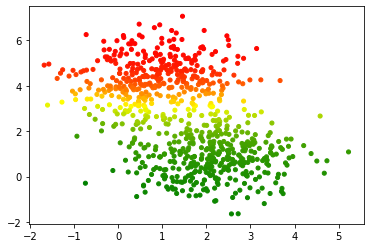

In [109]:
plt.scatter(X_train[:,0], X_train[:,1], c=Y_pred_train, cmap=my_cmap, s=15*(np.abs(np.sign(Y_pred_train-Y_train))+.1))
plt.show()

# Plots - to visulize and interpreat role of each weights

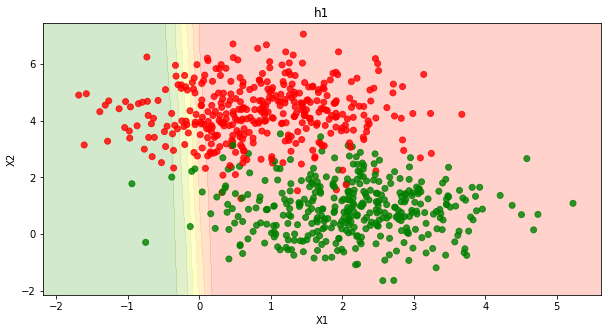

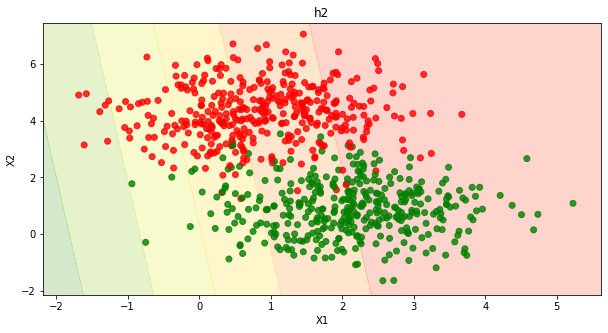

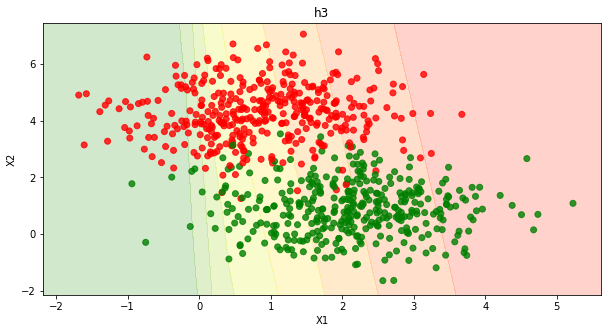

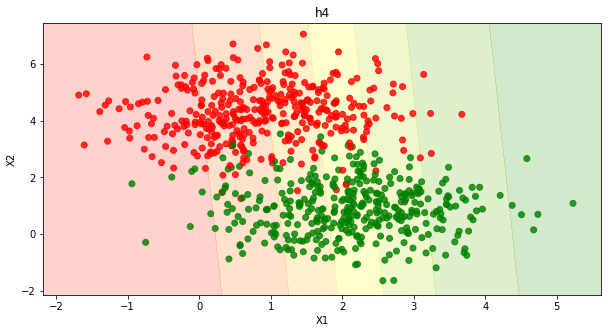

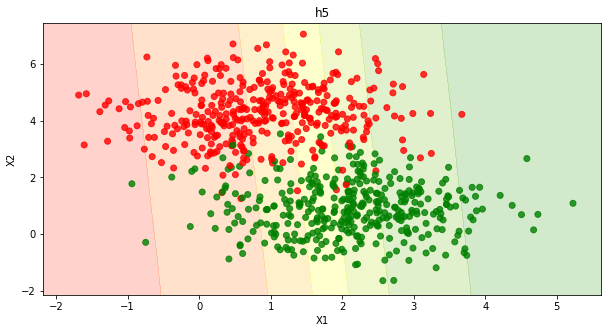

True

In [110]:
def make_meshgrid(x,y,h=0.2):
  x_min, x_max = x.min() - 0.5, x.max()+0.5
  y_min, y_max = y.min() - 0.5, y.max()+0.5
  xx, yy = np.meshgrid(np.arange(x_min,x_max,h),
                       np.arange(y_min,y_max,h))
  return xx,yy

def plot_contours(ax,predict,xx,yy,**params):
  Z = predict(np.c_[xx.ravel(),yy.ravel()])
  Z = Z.reshape(xx.shape)
  out = ax.contourf(xx,yy,Z,**params)
  return out

def plot_boundary():
  xx, yy = make_meshgrid(X_train[:,0],X_train[:,1])
  predict_function = [ffsn_multi.predict_h1,ffsn_multi.predict_h2,ffsn_multi.predict_h3,ffsn_multi.predict_h4,ffsn_multi.predict_h5]

  for i in range(len(predict_function)):
    fig , ax = plt.subplots(figsize=(10,5))
    plot_contours(ax, predict_function[i],xx,yy,cmap=my_cmap, alpha=0.2)
    ax.scatter(X_train[:,0],X_train[:,1],c=Y_train,cmap=my_cmap,alpha=0.8)
    ax.set_xlim(xx.min(),xx.max())
    ax.set_ylim(yy.min(),yy.max())
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_title('h'+str(i+1))
    plt.show()

  return True

plot_boundary()



# Visulizing the weights



In [111]:
import seaborn as sns
def plot_heat_map(epoch):
  fig = plt.figure()
  sns.heatmap(weight_matrices[epoch],annot=True,cmap=my_cmap,vmin=-3,vmax=3)
  plt.title('Epoch'+str(epoch))
  fig.canvas.draw()
  image = np.frombuffer(fig.canvas.tostring_rgb(),dtype='uint8')
  image = image.reshape(fig.canvas.get_width_height()[::-1]+(3,))
  return image




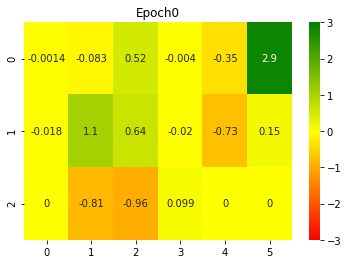

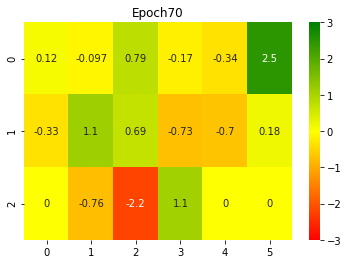

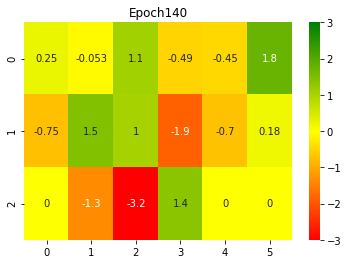

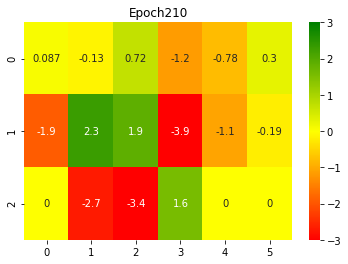

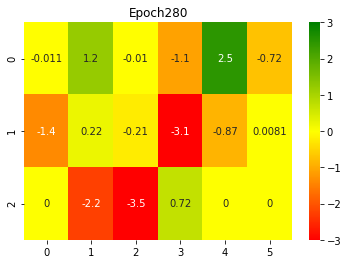

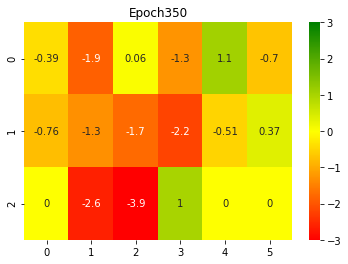

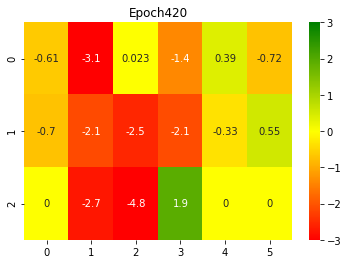

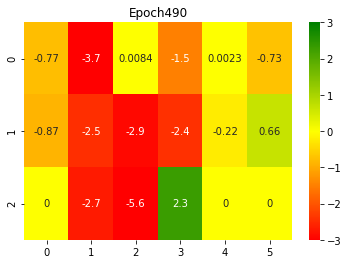

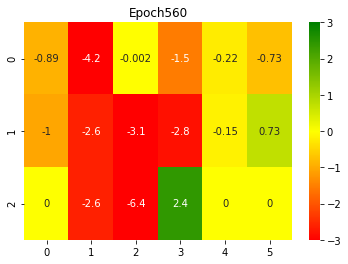

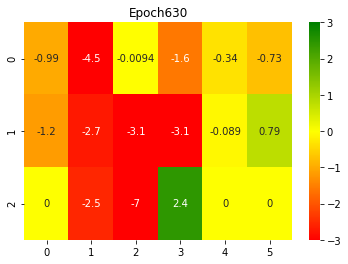

In [112]:
import imageio
imageio.mimsave('./weights_viz.gif',[plot_heat_map(i) for i in range(0,len(weight_matrices),len(weight_matrices)//10)],fps=1)